In [25]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'

In [48]:
f = '../singlegamma_oldtunedcuts.root'
f = '../backgrounds.root'

t = rn.root2array(f,treename='tree')
df = pd.DataFrame(t)

In [49]:
cos_v = df.query('bkgd_id == 2')
nc_v = df.query('bkgd_id == 5')
mult_v = df.query('bkgd_id == 6')
sig_v = df.query('bkgd_id == 8')
ccoth_v = df.query('bkgd_id == 10 or bkgd_id == 9')
#nue_v = df.query('bkgd_id == 3')
#anti_v = df.query('bkgd_id == 4')
#outfv_v = df.query('bkgd_id == 7')
#gam_v = df.query('bkgd_id == 9')
test_v = df.query('bkgd_id == 3 or bkgd_id == 4 or bkgd_id == 7')

colors = ['red','orange','yellow','lime','green','blue','magenta','purple','tan']
labels = ['Cosmic','$\\nu_e$','$\\overline{\\nu}_{\mu}$ $\pi^0$','NC $\pi^0$','Mult $\pi^0$','Out of FV','N Gamma','CCOther','Signal']

colors_tst = ['purple','yellow','lime','green','blue','tan'] #magenta','tan']
labels_tst = ['Other','Cosmic','NC $\pi^0$','Mult $\pi^0$','CC-Other','Signal']

colors_tst = ['purple','yellow','lime','green','lightskyblue'] #magenta','tan']
labels_tst = ['Other','Cosmic','NC $\pi^0$','Mult $\pi^0$','CC-Other']

colors_tst = ['purple','yellow','lime','green','lightskyblue','tan','salmon'] #magenta','tan']
labels_tst = ['Other','Cosmic','NC $\pi^0$','Mult $\pi^0$','CC-0$\pi^0$','N-$\gamma$','Signal']

colors_tst = ['purple','yellow','lime','green','lightskyblue','salmon'] #magenta','tan']
labels_tst = ['Other','Cosmic','NC $\pi^0$','CC > 1$\pi^0$','CC 0$\pi^0$','Signal']

In [50]:
print "Total Signal : ", len(sig_v), df.shape[0]
print "Signal Purity: ", float(len(sig_v))/df.shape[0]

#print len(cos_v) + len(nc_v) + len(mult_v) + len(sig_v) + len(ccoth_v) + \
len(gam_v) + len(test_v)

Total Signal :  322 615
Signal Purity:  0.523577235772


47

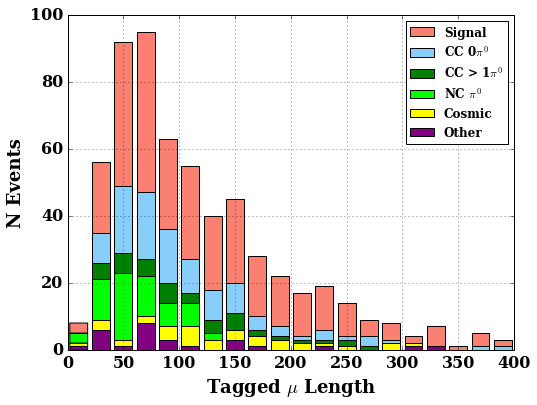

In [51]:
nbins = 20
var = 'mu_len'

plt.figure()
fig,ax = plt.subplots(figsize=(8,6))
ax.hist([test_v[var].values,cos_v[var].values,nc_v[var].values,mult_v[var].values,\
          ccoth_v[var].values,sig_v[var].values],\
          bins=nbins,label=labels_tst,color=colors_tst,stacked=True,range=(0,400))

handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12) #,loc='upper left',bbox_to_anchor=(1,0.9))
plt.grid(True)
plt.xlabel('Tagged $\mu$ Length',fontsize=18,weight='bold')
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.savefig('Pi0EffPlots/mu_len.png')

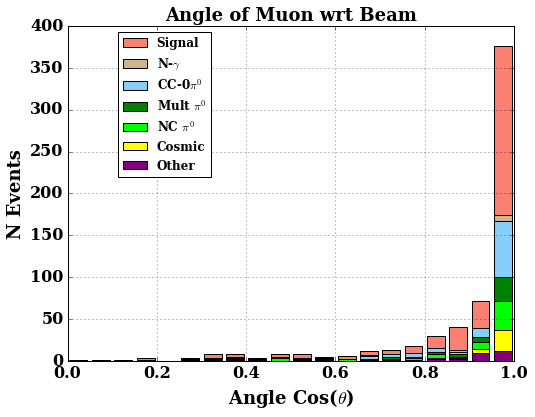

In [20]:
nbins = 20
var = 'mu_angle'

fig,ax = plt.subplots(figsize=(8,6))
ax.hist([test_v[var].values,cos_v[var].values,nc_v[var].values,mult_v[var].values,\
          ccoth_v[var].values,gam_v[var].values,sig_v[var].values],\
          bins=nbins,label=labels_tst,color=colors_tst,stacked=True,range=(0.,1.))
#plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
#        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
#plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12,loc='upper left',bbox_to_anchor=(.1,1)) 
plt.grid(True)
plt.xlabel('Angle Cos($\\theta$)',fontsize=18,weight='bold')
plt.title('Angle of Muon wrt Beam',fontweight='bold',fontsize=18)
plt.ylabel('N Events',fontsize=18,weight='bold')
#plt.yscale('log')
#plt.ylim(0,80)
plt.xlim(0,1)
plt.savefig('Pi0EffPlots/mu_angle.png')

In [6]:
tot_on = 541554 #525613
tot_off = 218466 #379202
tot_bnbcos = 384200 #101600

scale_intime = 10.279 
int_per_1e20POT = 99035.2 
dataPOT = 0.495 * (tot_on) / 547616  
mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 

off_to_on = 1.23 * (382718./tot_off) * (tot_on/547616.)
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

sig_w = [ mc_to_onbeam for i in xrange(len(sig_v['pi0_mass'].values)) ] 
cc_w = [ mc_to_onbeam for i in xrange(len(ccoth_v['pi0_mass'].values)) ] 
cos_w = [ mc_to_onbeam for i in xrange(len(cos_v['pi0_mass'].values)) ] 
nc_w = [ mc_to_onbeam for i in xrange(len(nc_v['pi0_mass'].values)) ] 
mult_w = [ mc_to_onbeam for i in xrange(len(mult_v['pi0_mass'].values)) ] 
oth_w = [ mc_to_onbeam for i in xrange(len(test_v['pi0_mass'].values)) ] 

weights = [oth_w,cos_w,nc_w,mult_w,cc_w]#,sig_w]

all_w = [ mc_to_onbeam for i in xrange(len(df['pi0_mass'].values)) ] 
#print len(all_w)

POTS :  0.489520448636 3.87942872837
MC to OnBeam :  0.126183642724
Off to OnBeam:  2.13091331027


In [37]:
on ='onbeam_pi0_selection.root'
off ='offbeam_pi0_selection.root'

on ='onbeam_pi0_selection_DCgain.root'
off ='offbeam_pi0_selection_DCgain.root'

a = rn.root2array(on,treename='pi0_selection')
df0 = pd.DataFrame(a)

b = rn.root2array(off,treename='pi0_selection')
df1 = pd.DataFrame(b)

df0.head()

,_event,_pi0_mass,_pi0_mom,_pi0_oangle,_pi0_low_shrE,_pi0_high_shrE,_pi0_low_radL,_pi0_high_radL,_mu_mom,_mu_angle
0,28,77.357407,294.854126,1.006847,22.791174,282.041779,3.625700,7.007521,-10.0,-10.0
1,31,123.633865,224.392471,1.763752,28.116859,228.080948,3.611461,3.241116,-10.0,-10.0
2,32,49.722271,89.296875,1.428281,16.886955,85.319878,31.288452,32.515278,-10.0,-10.0
3,50,427.885529,1344.850708,1.289909,96.316017,1314.963379,16.071306,1.105624,-10.0,-10.0
4,128,116.820702,121.999077,2.903515,23.857224,145.053558,11.370670,15.683684,-10.0,-10.0


In [38]:
nbins = 25
Emax = 400

x_on, y_on = np.histogram(df0._pi0_mass.values,bins=nbins,range=(0,500))
x_off, y_off = np.histogram(df1._pi0_mass.values,bins=nbins,range=(0,500))
x_bnb, y_bnb = np.histogram(df.pi0_mass.values,bins=nbins,range=(0,500))

bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on

off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

(0, 30)

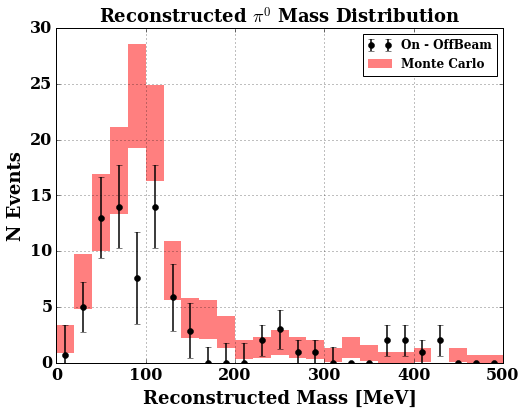

In [40]:
nbins = 20

fig,ax = plt.subplots(figsize=(8,6))
#ax.hist([test_v['pi0_mass'].values,cos_v['pi0_mass'].values,nc_v['pi0_mass'].values,mult_v['pi0_mass'].values,\
#          ccoth_v['pi0_mass'].values],bins=nbins,label=labels_tst,color=colors_tst,stacked=True,range=(0,400),weights=weights)
#ax.hist([test_v['pi0_mass'].values,cos_v['pi0_mass'].values,nc_v['pi0_mass'].values,mult_v['pi0_mass'].values,\
#          ccoth_v['pi0_mass'].values],sig_v['pi0_mass'].values],\
#bins=nbins,label=labels_tst,color=colors_tst,stacked=True,range=(0,400),weights=weights)
plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
plt.grid(True)
plt.xlabel('Reconstructed Mass [MeV]',fontsize=18,weight='bold')
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.title('Reconstructed $\pi^0$ Mass Distribution',fontweight='bold',fontsize=18)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12)
plt.savefig('Pi0EffPlots/pi0_mass.png')
plt.ylim(0,30)

In [8]:
nbins = 20
Emax = 400

x_on, y_on = np.histogram(df0._pi0_oangle.values,bins=nbins,range=(0,3.2))
x_off, y_off = np.histogram(df1._pi0_oangle.values,bins=nbins,range=(0,3.2))
x_bnb, y_bnb = np.histogram(df.pi0_oangle.values,bins=nbins,range=(0,3.2))


bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on

off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

### print x[0].shape

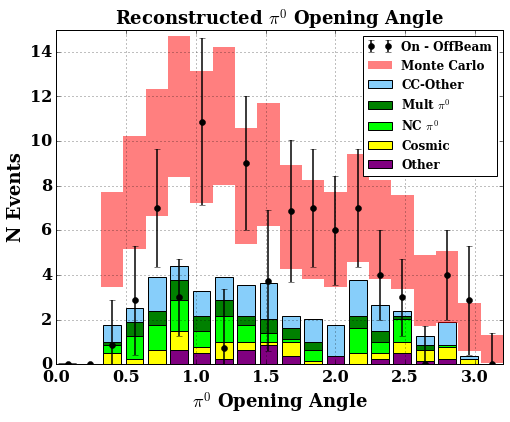

In [9]:
nbins = 20

var = 'pi0_oangle'

#plt.figure(figsize=(10,8))
fig,ax = plt.subplots(figsize=(8,6))
ax.hist([test_v[var].values,cos_v[var].values,nc_v[var].values,mult_v[var].values,\
          ccoth_v[var].values],bins=nbins,label=labels_tst,color=colors_tst,weights=weights,stacked=True,range=(0,3.2))
plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12)#,loc='upper left',bbox_to_anchor=(1,0.9))
plt.grid(True)
plt.xlim(0,3.2)
plt.ylim(0,15)
plt.title('Reconstructed $\pi^0$ Opening Angle',fontweight='bold',fontsize=18)
plt.xlabel('$\pi^0$ Opening Angle',fontsize=18,weight='bold')
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.savefig('Pi0EffPlots/pi0_oangle.png')

In [10]:
nbins = 20
Emax = 400

x_on, y_on = np.histogram(df0._pi0_mom.values,bins=nbins,range=(0,1000))
x_off, y_off = np.histogram(df1._pi0_mom.values,bins=nbins,range=(0,1000))
x_bnb, y_bnb = np.histogram(df.pi0_mom.values,bins=nbins,range=(0,1000))

bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on

off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

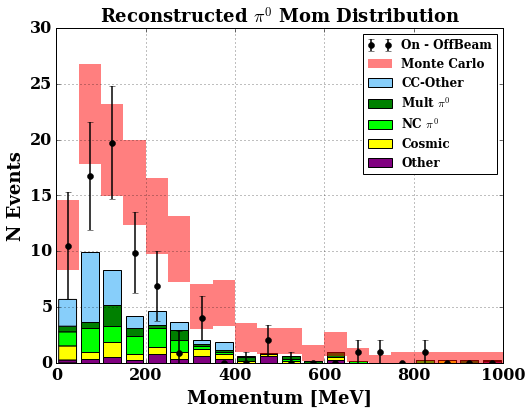

In [11]:
nbins = 20
var = 'pi0_mom'

fig,ax = plt.subplots(figsize=(8,6))
ax.hist([test_v[var].values,cos_v[var].values,nc_v[var].values,mult_v[var].values,\
          ccoth_v[var].values],weights=weights,\
          bins=nbins,label=labels_tst,color=colors_tst,stacked=True,range=(0,1000))
plt.bar(bins - bin_width/2,err_mc*2,bin_width,bottom = bnbcos_m - err_mc/2.,\
        alpha=0.5, color='r', linewidth=0,label='Monte Carlo')
plt.errorbar(bins,off_min_on_m,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12)#,loc='upper left',bbox_to_anchor=(1,0.9))
plt.grid(True)
plt.ylim(0,30)
plt.title('Reconstructed $\pi^0$ Mom Distribution',fontweight='bold',fontsize=18)
plt.xlabel('Momentum [MeV]',fontsize=18,weight='bold')
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.savefig('Pi0EffPlots/pi0_mom.png')

In [ ]:
print df.head()
print df0.head()

In [13]:
nbins = 20
Emax = 400

x_on, y_on = np.histogram(df0._mu_angle.values,bins=nbins,range=(0,1))
x_off, y_off = np.histogram(df1._mu_angle.values,bins=nbins,range=(0,1))
x_bnb, y_bnb = np.histogram(df.mu_angle.values,bins=nbins,range=(0,1))

bins = (y_off[:-1] + y_off[1:])/2
bin_width = bins[1]-bins[0]

bnbcos_m = x_bnb * mc_to_onbeam 
off_min_on_m = x_on - x_off*off_to_on
off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]


err_on = np.sqrt(x_on)
err_off = np.sqrt(x_off)
err_data = np.sqrt(err_on * err_on + err_off * err_off)
err_mc = np.sqrt(bnbcos_m)

ValueError: color kwarg must have one color per dataset

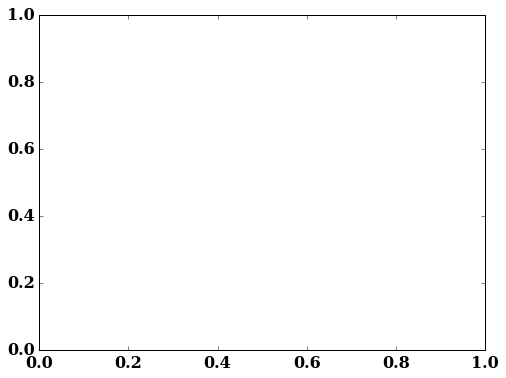

In [15]:
nbins = 20
var = 'vtx_x'

fig,ax = plt.subplots(figsize=(8,6))
ax.hist([test_v[var].values,cos_v[var].values,nc_v[var].values,mult_v[var].values,\
          ccoth_v[var].values,sig_v[var].values],\
          bins=nbins,label=labels_tst,color=colors_tst,stacked=True,range=(0.,250.))

handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12,loc='upper left',bbox_to_anchor=(0.8,1)) 
plt.xlabel('Reco Vertex X [cm]',fontsize=18,weight='bold')
plt.grid(True)
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.savefig('Pi0EffPlots/vtxx.png')

In [ ]:
nbins = 20
var = 'vtx_y'

plt.figure()
fig,ax = plt.subplots(figsize=(8,6))
ax.hist([test_v[var].values,cos_v[var].values,nc_v[var].values,mult_v[var].values,\
          ccoth_v[var].values,sig_v[var].values],\
          bins=nbins,label=labels_tst,color=colors_tst,stacked=True,range=(-110,110))

handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12,loc='upper left',bbox_to_anchor=(0.7,1.1)) 
plt.grid(True)
plt.xlim(-105,105)
plt.xlabel('Reco Vertex Y [cm]',fontsize=18,weight='bold')
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.savefig('Pi0EffPlots/vtxy.png')

In [ ]:
nbins = 20
var = 'vtx_z'

plt.figure()
fig,ax = plt.subplots(figsize=(8,6))
ax.hist([test_v[var].values,cos_v[var].values,nc_v[var].values,mult_v[var].values,\
          ccoth_v[var].values,sig_v[var].values],\
          bins=nbins,label=labels_tst,color=colors_tst,stacked=True,range=(0,1000))
handles,labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[::-1],fontsize=12,loc='upper left',bbox_to_anchor=(-.01,1.1)) 
plt.xlabel('Reco Vertex Z [cm]',fontsize=18,weight='bold')
plt.grid(True)
plt.ylabel('N Events',fontsize=18,weight='bold')
plt.savefig('Pi0EffPlots/vtxz.png')

In [16]:
f_root = TFile("CCpi0hist_pandoraNu_pandoraNu.root");

f_full = 'MCVars_mcc8_full.root'
f_sel2 = 'MCVars_mcc8_sel2Cuts.root'
f_rc = 'MCVars_mcc8_ratioCuts.root'
f_pc = 'MCVars_mcc8_pi0Cuts.root'

a_full = rn.root2array(f_full,treename='pi0_tree')
a_sel2 = rn.root2array(f_sel2,treename='pi0_tree')
a_rc = rn.root2array(f_rc,treename='pi0_tree')
a_pc = rn.root2array(f_pc,treename='pi0_tree')

df_full = pd.DataFrame(a_full)
df_sel2 = pd.DataFrame(a_sel2)
df_rc = pd.DataFrame(a_rc)
df_pc = pd.DataFrame(a_pc)

In [17]:
df_full.head()

,true_pi0_e,true_angle,true_asym,reco_pi0_e,true_pi0_mom,true_gamma_e_min,true_gamma_e_max,true_RL_maxE,true_RL_minE,true_nu_e,event
0,197.737381,1.551643,0.634866,-999.0,144.500763,76.786301,120.948753,9.379167,21.500515,0.870884,1093664768
1,216.593658,1.379655,0.662842,-999.0,169.390701,86.337738,130.253799,13.233510,30.444183,0.986710,1105199104
2,434.957703,0.673049,0.490545,-999.0,413.483490,143.146210,291.810425,12.221223,3.903167,1.680696,1132396544
3,191.236328,1.602094,0.689131,-999.0,135.468582,78.019554,113.214378,14.724538,6.067541,0.630250,1133543424
4,143.066498,2.519908,0.763485,-999.0,47.417534,61.937984,81.125305,6.785769,40.631557,0.976972,1135542272


In [18]:
mom_full, bin_full = np.histogram(df_full.true_pi0_mom.values,bins=20,\
                                 range=(0,1500))
bins = (bin_full[:-1] + bin_full[1:])/2
err_effx = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(mom_full)

# Now take care of ratio and pi0 cuts
mom_sel2, bin_sel2 = np.histogram(df_sel2.true_pi0_mom.values,bins=20,\
                                 range=(0,1500))
err_sel2_y = np.sqrt(mom_sel2)

mom_rc, bin_rc = np.histogram(df_rc.true_pi0_mom.values,bins=20,\
                             range=(0,1500))
err_rc_y = np.sqrt(mom_rc)

mom_pc, bin_pc = np.histogram(df_pc.true_pi0_mom.values,bins=20,\
                             range=(0,1500))
err_pc_y = np.sqrt(mom_pc)

mom_b = mom_full
# Efficiency
sel2_eff = [float(mom_sel2[i])/mom_b[i] if mom_b[i] != 0. else 0. for i in xrange(len(mom_sel2))]
rc_eff = [float(mom_rc[i])/mom_b[i] if mom_b[i] != 0. else 0. for i in xrange(len(mom_rc))]
pc_eff = [float(mom_pc[i])/mom_b[i] if mom_b[i] != 0. else 0. for i in xrange(len(mom_pc))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./mom_sel2[i] + 1./mom_b[i]) \
            if mom_b[i] != 0. and sel2_eff[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./mom_rc[i] + 1./mom_b[i]) \
            if mom_b[i] != 0. and rc_eff[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./mom_pc[i] + 1./mom_b[i]) \
            if mom_b[i] != 0. and pc_eff[i] !=0 else 0. \
            for i in xrange(len(bins))]

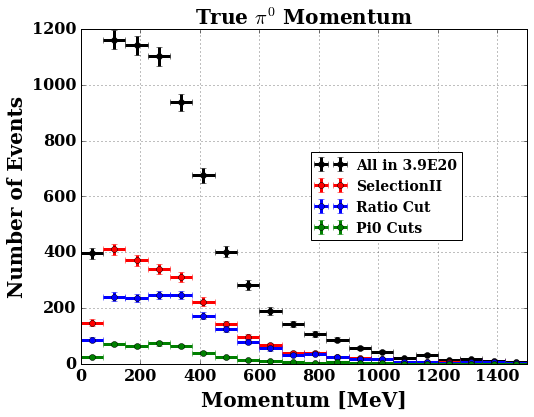

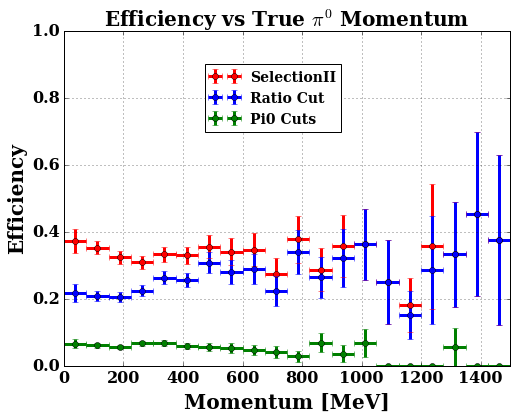

In [19]:
plt.figure(figsize=(8,6))
plt.errorbar(bins,mom_full,yerr=err_full_y,xerr=err_effx,fmt='o',color='k',lw=3,label='All in 3.9E20')
plt.errorbar(bins,mom_sel2,yerr=err_sel2_y,xerr=err_effx,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,mom_rc,yerr=err_rc_y,xerr=err_effx,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,mom_pc,yerr=err_pc_y,xerr=err_effx,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True $\pi^0$ Momentum',fontsize=20,weight='bold')
plt.xlabel('Momentum [MeV]',fontsize=20,weight='bold')
plt.ylabel('Number of Events',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.5,0.5),fontsize=14)
plt.xlim(0,1500)
plt.savefig('Pi0EffPlots/Pi0Mom.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_effx,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_effx,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_effx,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Efficiency vs True $\pi^0$ Momentum',fontsize=20,weight='bold')
plt.xlabel('Momentum [MeV]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(0.3,0.8),fontsize=14)
plt.ylim(0,1.)
plt.xlim(0,1500)
#plt.yscale('log')
plt.savefig('Pi0EffPlots/Pi0MomEff.png')


In [20]:
var = 'true_angle'

full_v, bins_full = np.histogram(df_full[var].values,bins=20,range=(0,3.2))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(0,3.2))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=20,range=(0,3.2))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(0,3.2))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]


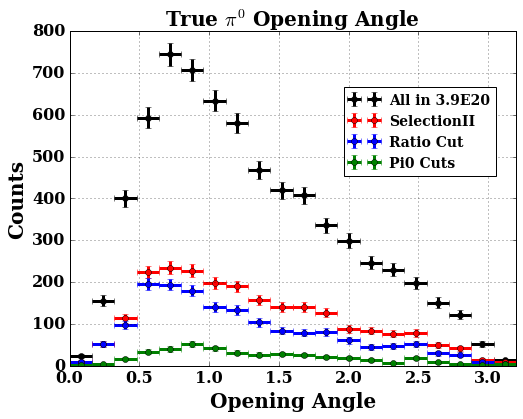

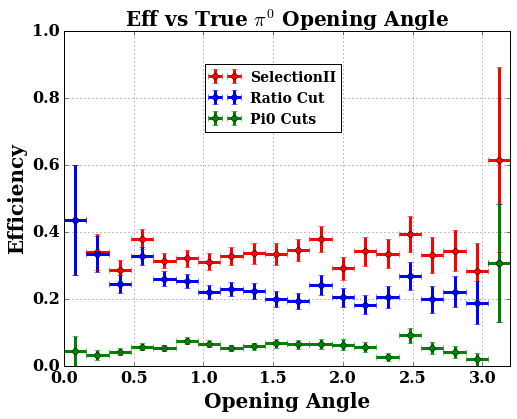

In [21]:
plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 3.9E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True $\pi^0$ Opening Angle',fontsize=20,weight='bold')
plt.xlabel('Opening Angle',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.6,0.7),fontsize=14)
plt.xlim(0,3.2)
plt.savefig('Pi0EffPlots/Pi0OAngle.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Eff vs True $\pi^0$ Opening Angle',fontsize=20,weight='bold')
plt.xlabel('Opening Angle',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0,1.0)
plt.xlim(0,3.2)
plt.savefig('Pi0EffPlots/Pi0OAngleEff.png')

In [28]:
var = 'true_nu_e'

n = 30 #100
full_v, bins_full = np.histogram(df_full[var].values,bins=n,range=(0.2,7.))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=n,range=(0.2,7))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=n,range=(0.2,7.))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=n,range=(0.2,7.))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]


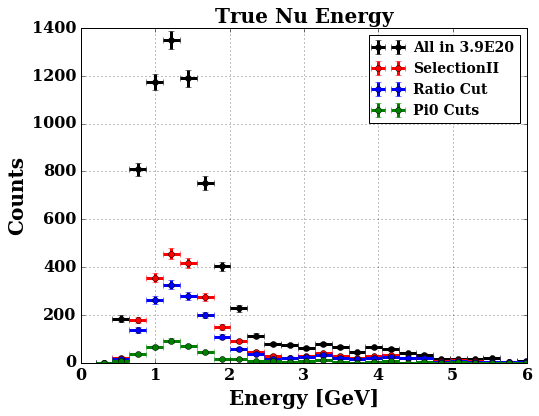

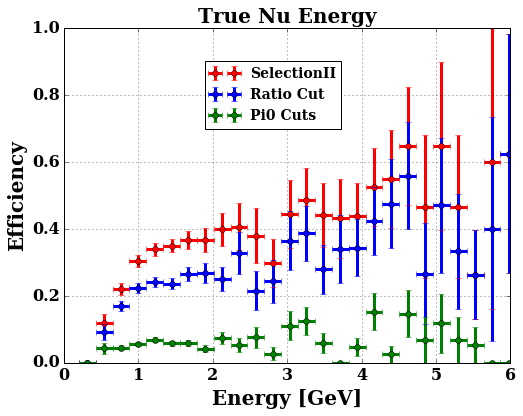

In [30]:
plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 3.9E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True Nu Energy',fontsize=20,weight='bold')
plt.xlabel('Energy [GeV]',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(fontsize=14)
plt.xlim(0.,6)
plt.savefig('Pi0EffPlots/NuEnergy.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True Nu Energy',fontsize=20,weight='bold')
plt.xlabel('Energy [GeV]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0.,1.)
plt.xlim(0,6) #0.3,0.7)
plt.savefig('Pi0EffPlots/NuEnergyEff.png')

In [132]:
var = 'true_gamma_e_max'

full_v, bins_full = np.histogram(df_full[var].values,bins=20,range=(0,1000))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(0,1000))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=20,range=(0,1000))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(0,1000))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]


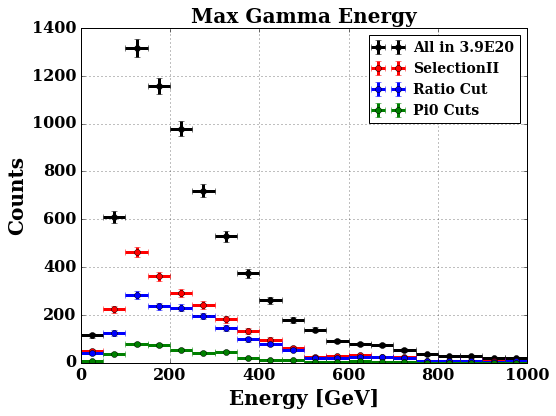

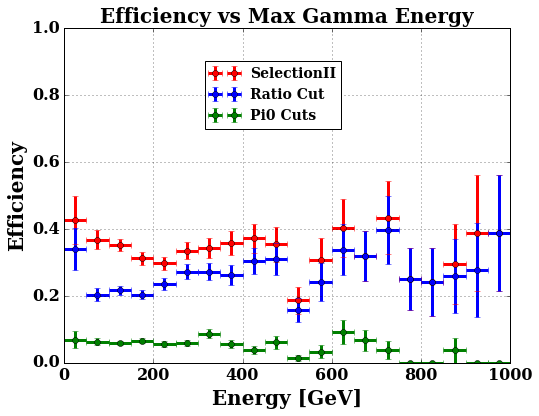

In [133]:
plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 3.9E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Max Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Energy [GeV]',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(fontsize=14)
#plt.xlim(0,2.5)
plt.savefig('Pi0EffPlots/GammaMaxEnergy.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Efficiency vs Max Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Energy [GeV]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0,1.)
#plt.xlim(0,2.5)
plt.savefig('Pi0EffPlots/GammaMaxEnergyEff.png')

In [134]:
var = 'true_gamma_e_min'

full_v, bins_full = np.histogram(df_full[var].values,bins=20,range=(0,500))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(0,500))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=20,range=(0,500))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(0,500))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]


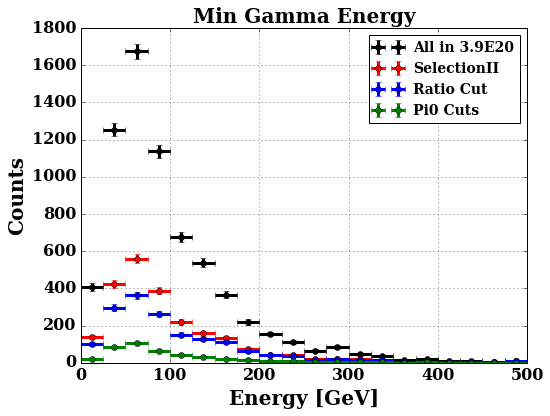

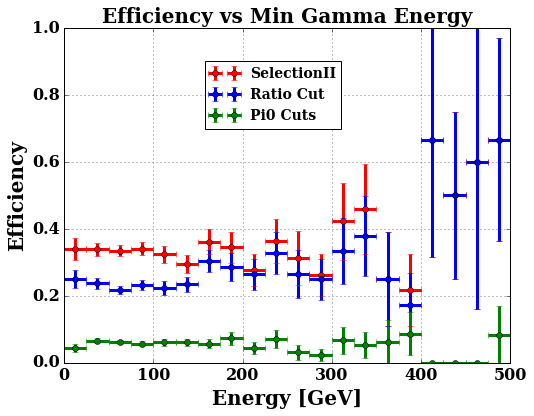

In [135]:
plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 3.9E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Min Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Energy [GeV]',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(fontsize=14)
#plt.xlim(0,2.5)
plt.savefig('Pi0EffPlots/GammaMinEnergy.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Efficiency vs Min Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Energy [GeV]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0,1.)
#plt.xlim(0,2.5)
plt.savefig('Pi0EffPlots/GammaMinEnergyEff.png')

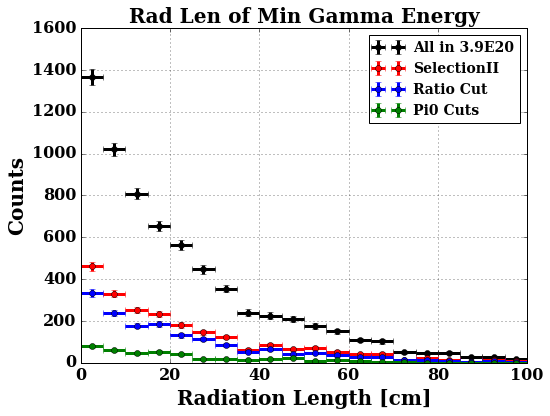

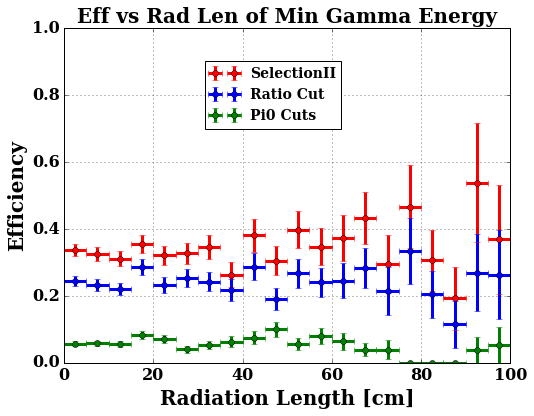

In [137]:
var = 'true_RL_minE'

full_v, bins_full = np.histogram(df_full[var].values,bins=20,range=(0,100))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(0,100))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=20,range=(0,100))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(0,100))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 3.9E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Rad Len of Min Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Radiation Length [cm]',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(fontsize=14)
#plt.xlim(0,2.5)
plt.savefig('Pi0EffPlots/RLMinEnergy.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Eff vs Rad Len of Min Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Radiation Length [cm]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0,1.)
#plt.xlim(0,2.5)
plt.savefig('Pi0EffPlots/RLMinEnergyEff.png')

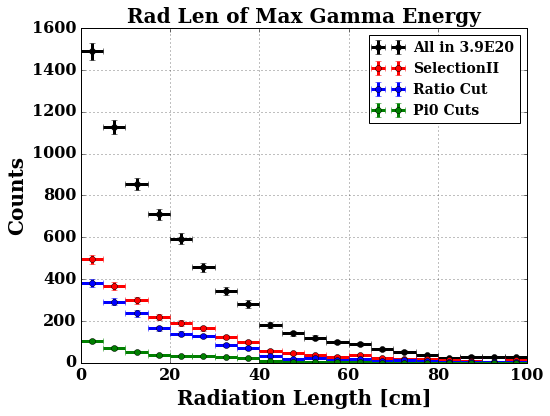

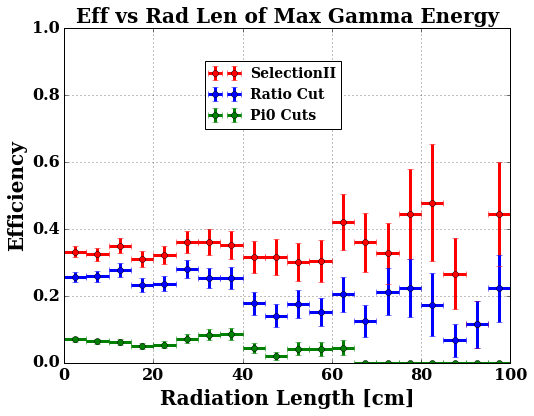

In [138]:
var = 'true_RL_maxE'

full_v, bins_full = np.histogram(df_full[var].values,bins=20,range=(0,100))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(0,100))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=20,range=(0,100))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(0,100))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 3.9E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Rad Len of Max Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Radiation Length [cm]',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(fontsize=14)
#plt.xlim(0,2.5)
plt.savefig('Pi0EffPlots/RLMaxEnergy.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Eff vs Rad Len of Max Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Radiation Length [cm]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0,1.)
plt.savefig('Pi0EffPlots/RLMaxEnergyEff.png')

In [142]:
df_full.head()

,true_pi0_e,true_angle,true_asym,reco_pi0_e,true_pi0_mom,true_gamma_e_min,true_gamma_e_max,true_RL_maxE,true_RL_minE,true_nu_e,event
0,197.737381,1.551643,0.634866,-999.0,144.500763,76.786301,120.948753,9.379167,21.500515,0.870884,1093664768
1,216.593658,1.379655,0.662842,-999.0,169.390701,86.337738,130.253799,13.233510,30.444183,0.986710,1105199104
2,434.957703,0.673049,0.490545,-999.0,413.483490,143.146210,291.810425,12.221223,3.903167,1.680696,1132396544
3,191.236328,1.602094,0.689131,-999.0,135.468582,78.019554,113.214378,14.724538,6.067541,0.630250,1133543424
4,143.066498,2.519908,0.763485,-999.0,47.417534,61.937984,81.125305,6.785769,40.631557,0.976972,1135542272


In [153]:
n = 6893

dn = math.sqrt(6893)

In [154]:
s = n /8.969e29/2.05e11
ds = dn /8.969e29/2.05e11

print s, "+-", ds

3.74895643259e-38 +- 4.51550423756e-40


In [161]:
n = (779 - 370.)/0.059335557
dn = math.sqrt(779 + 370)/0.059335557

s = n /8.969e29/2.05e11
ds = dn /8.969e29/2.05e11

print s, "+-", ds

3.74895648391e-38 +- 3.10704186949e-39


In [63]:
dn = math.sqrt(71 + 71*0.475)/8.969e29/.05933555781227332/2.5862650266e+10
print dn


7.43520768447e-39


In [64]:
print (71. - 71*0.475)/8.969e29/.05933555781227332/2.5862650266e+10
print (779 - 779*0.475)/8.969e29/.05933555781227332/2.05e11

3.73812051398e-38
3.74872727877e-38


In [179]:
541554./547616 * 3.1

3.0656836177175246

In [3]:
tot_on = 541554 #525613
tot_off = 218466 #379202
tot_bnbcos = 384200 #101600

scale_intime = 10.279 
int_per_1e20POT = 99035.2 
dataPOT = 0.495 * (tot_on) / 547616  
mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 

off_to_on = 1.23 * (382718./tot_off) * (tot_on/547616.)
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on



POTS :  0.489520448636 3.87942872837
MC to OnBeam :  0.126183642724
Off to OnBeam:  2.13091331027


In [22]:
# Separate MCC7 norm calculation
tot_on = 547541 #525613
tot_off = 220592 #379202
tot_bnbcos = 188000 #101600

scale_intime = 5.12 
int_per_1e20POT = 83048.6
dataPOT = 0.495 * (tot_on) / 547616  
mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 

off_to_on = 1.23 * (382718./tot_off) * (tot_on/547616.)
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on


POTS :  0.494932206144 2.26373472882
MC to OnBeam :  0.218635249017
Off to OnBeam:  2.13370688102


In [42]:
on0 = 5988
off0 = 601 * 1.6/1.45
mc0 = 17333 * 1.6/1.35
#mc_to_onbeam *= 1.6/1.35


min0 = on0 - off0 * off_to_on
mcsc0 = mc0 * mc_to_onbeam
dd0 = math.sqrt(on0 + (off0*off_to_on))
dm0 = math.sqrt(mcsc0*mc_to_onbeam)

print
print "Final MC : ", mcsc0, " +- ", dm0
print "Final On : ", on0 , " +- ", math.sqrt(on0)
print "Final Off : ", off0*off_to_on , " +- ", math.sqrt(off0*off_to_on)
print "Final Off-On : ", min0, " +- ", dd0

on0 = 1808
off0 = 238* 1.6/1.45
mc0 = 4363

min0 = on0 - off0 * off_to_on
mcsc0 = mc0 * mc_to_onbeam
dd0 = math.sqrt(on0 + (off0*off_to_on))
dm0 = math.sqrt(mcsc0*mc_to_onbeam)

print
print "Final MC : ", mcsc0, " +- ", dm0
print "Final On : ", on0 , " +- ", math.sqrt(on0)
print "Final Off : ", off0*off_to_on , " +- ", math.sqrt(off0*off_to_on)
print "Final Off-On : ", min0, " +- ", dd0


on0 = 140
off0 = 9* 1.6/1.45
mc0 = 585

min0 = on0 - off0 * off_to_on
mcsc0 = mc0 * mc_to_onbeam
dd0 = math.sqrt(on0 + (off0*off_to_on))
dm0 = math.sqrt(mcsc0*mc_to_onbeam)

print
print "Final MC : ", mcsc0, " +- ", dm0
print "Final On : ", on0 , " +- ", math.sqrt(on0)
print "Final Off : ", off0*off_to_on , " +- ", math.sqrt(off0*off_to_on)
print "Final Off-On : ", min0, " +- ", dd0



Final MC :  4491.38343255  +-  31.3364761134
Final On :  5988  +-  77.3821684886
Final Off :  1415.01554261  +-  37.6166923401
Final Off-On :  4572.98445739  +-  86.0407783706

Final MC :  953.905591461  +-  14.4415160744
Final On :  1808  +-  42.5205832509
Final Off :  560.355572616  +-  23.6718307829
Final Off-On :  1247.64442738  +-  48.6657535914

Final MC :  127.901620675  +-  5.28808119132
Final On :  140  +-  11.8321595662
Final Off :  21.1899166115  +-  4.60325065704
Final Off-On :  118.810083388  +-  12.6960590977


In [26]:

math.sqrt(4095 *.126)

22.71497303542313

In [28]:
#MCC7 Adjust

In [30]:
mc0 = 17333 
print mc0 * 1.6/1.35

mc0 = 4363
print mc0 * 1.6/1.35

mc0 = 586 
print mc0 * 1.6/1.35

20542.8148148
5170.96296296
694.518518519


In [31]:
mc0 = 1584 
print mc0 * 1.6/1.35

mc0 = 1107
print mc0 * 1.6/1.35

mc0 = 323
print mc0 * 1.6/1.35

1877.33333333
1312.0
382.814814815


In [32]:
1312./1877

0.6989877464038359

In [33]:
383./1312

0.2919207317073171

In [34]:
383./694

0.5518731988472623

In [35]:
409./779

0.5250320924261874

In [36]:
121./4705

0.0257173219978746

In [37]:
127./4491

0.028278779781785793

In [38]:
98./4095

0.023931623931623933

In [39]:
71./2680

0.026492537313432835

In [ ]:
1282 * 1.6/1.35